# Assignment on Multiple Regression_50_Startups

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA & Visualization

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.shape

(50, 5)

In [7]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


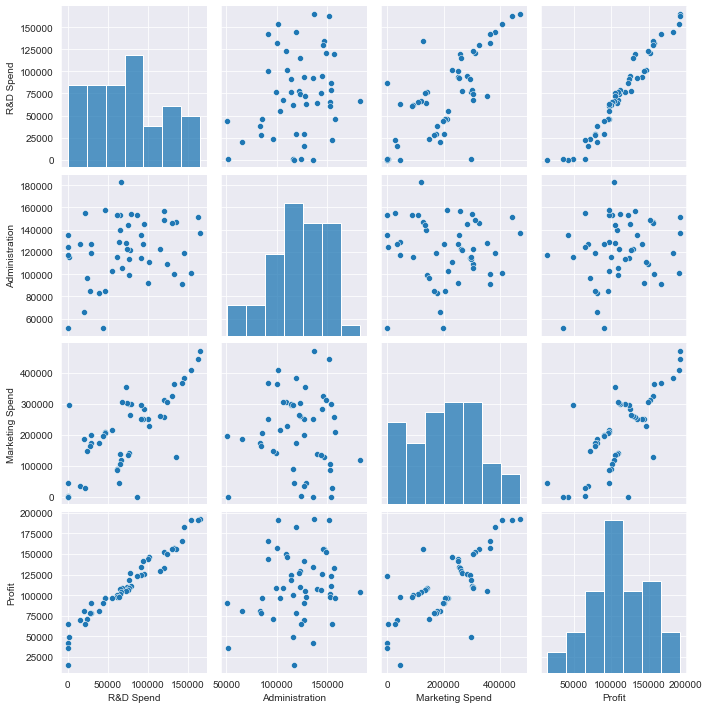

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [9]:
#Normalizing Data
startup1=startup

In [10]:
# Drop non numerical column
startup1.drop(['State'],axis=1,inplace=True)
startup1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
from sklearn.preprocessing import MinMaxScaler
norm =MinMaxScaler()
startup_norm = norm.fit_transform(startup1)

In [12]:
startup_norm

array([[1.        , 0.65174393, 1.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.99735461],
       [0.92798459, 0.37957895, 0.8646636 , 0.99317808],
       [0.87313643, 0.51299839, 0.81223513, 0.94729239],
       [0.85943772, 0.30532804, 0.77613557, 0.85317138],
       [0.797566  , 0.3694479 , 0.76912588, 0.80138177],
       [0.81412828, 0.73016111, 0.27071031, 0.79649041],
       [0.7880179 , 0.71745725, 0.68649342, 0.79440736],
       [0.72901786, 0.74173276, 0.66049977, 0.77446805],
       [0.74590551, 0.43692884, 0.64644319, 0.7606613 ],
       [0.61635061, 0.45150637, 0.48573267, 0.74017475],
       [0.60884455, 0.30836422, 0.52936195, 0.72968626],
       [0.56766982, 0.57883556, 0.52956308, 0.71462897],
       [0.55635219, 0.64106561, 0.53555202, 0.67364377],
       [0.72539353, 0.8013272 , 0.54370828, 0.66404417],
       [0.69261666, 0.54302973, 0.55486446, 0.64892083],
       [0.47180821, 0.53527036, 0.56031151, 0.63245443],
       [0.57246821, 0.71401273,

In [13]:
startup_df = pd.DataFrame(startup_norm)

In [14]:
startup_df.columns=['RD_S',	'Admin_S',	'MRKT_S', 'Profit']
startup_df.head()

,RD_S,Admin_S,MRKT_S,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997355
2,0.927985,0.379579,0.864664,0.993178
3,0.873136,0.512998,0.812235,0.947292
4,0.859438,0.305328,0.776136,0.853171


# Model Building

In [15]:
model = smf.ols('Profit ~RD_S+Admin_S+MRKT_S', data= startup_df).fit()

In [16]:
model.params

Intercept    0.191832
RD_S         0.750220
Admin_S     -0.019837
MRKT_S       0.072338
dtype: float64

In [17]:
np.round(model.tvalues, 4),np.round(model.pvalues, 4)

(Intercept     7.8760
 RD_S         17.8464
 Admin_S      -0.5255
 MRKT_S        1.6551
 dtype: float64,
 Intercept    0.0000
 RD_S         0.0000
 Admin_S      0.6018
 MRKT_S       0.1047
 dtype: float64)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        15:14:37   Log-Likelihood:                 78.973
No. Observations:                  50   AIC:                            -149.9
Df Residuals:                      46   BIC:                            -142.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1918      0.024      7.876      0.000       0.143       0.241
RD_S           0.7502      0.042     17.846      0.000       0.666       0.835
Admin_S       -0.0198      0.038     -0.526      0.602      -0.096       0.056
MRKT_S         0.0723      0.044      1.655      0.105      -0.016       0.160
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [20]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.875952
RD_S         17.846374
Admin_S      -0.525507
MRKT_S        1.655077
dtype: float64 
 Intercept    4.508627e-10
RD_S         2.634968e-22
Admin_S      6.017551e-01
MRKT_S       1.047168e-01
dtype: float64


# Simple Linear Regression

In [21]:
slr_A = smf.ols('Profit~ Admin_S', data= startup_df).fit()
slr_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 17 Jun 2022   Prob (F-statistic):              0.162
Time:                        15:14:37   Log-Likelihood:                 4.7321
No. Observations:                  50   AIC:                            -5.464
Df Residuals:                      48   BIC:                            -1.640
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4342      0.086      5.030      0.000       0.261       0.608
Admin_S        0.2136      0.150      1.419      0.162      -0.089       0.516
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         6.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
slr_M = smf.ols('Profit~ MRKT_S', data= startup_df).fit()
slr_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        15:14:37   Log-Likelihood:                 24.181
No. Observations:                  50   AIC:                            -44.36
Df Residuals:                      48   BIC:                            -40.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2552      0.043      5.898      0.000       0.168       0.342
MRKT_S         0.6548      0.084      7.803      0.000       0.486       0.824
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
mlr_AM = smf.ols('Profit~Admin_S+ MRKT_S', data=startup_df).fit()
mlr_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.50e-10
Time:                        15:14:37   Log-Likelihood:                 27.227
No. Observations:                  50   AIC:                            -48.45
Df Residuals:                      47   BIC:                            -42.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1247      0.067      1.861      0.069      -0.010       0.260
Admin_S        0.2394      0.097      2.468      0.017       0.044       0.435
MRKT_S         0.6611      0.080      8.281      0.000       0.501       0.822
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF

In [24]:
rsq_r = smf.ols('RD_S~ Admin_S+MRKT_S', data=startup_df).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Admin_S ~ RD_S+MRKT_S', data=startup_df).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('MRKT_S~ RD_S+Admin_S', data=startup_df).fit().rsquared
vif_m = 1/(1-rsq_m)

d1 = {'Varriables':['RD_S','Admin_S','MRKT_S'], 'Vif':[vif_r,vif_a,vif_m]}
vif_df= pd.DataFrame(d1)
vif_df

,Varriables,Vif
0,RD_S,2.468903
1,Admin_S,1.175091
2,MRKT_S,2.326773


# All the variables have vif < 20, therfore no multicollinearty in variables. 
## So we will consider all the variables in model building

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\dalwe\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


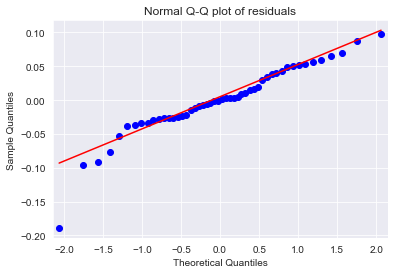

In [25]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid>10))

[array([], dtype=int64)]

In [27]:
list(np.where(model.resid<-.10))

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # z= (x-mu) / sigma

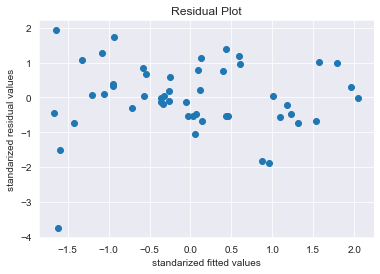

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

# Residual Vs Regressors

#### Test for errors or Residuals Vs Regressors or independent variables or predictors

#### using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)

#### exog = x-variable & endog = y-variable

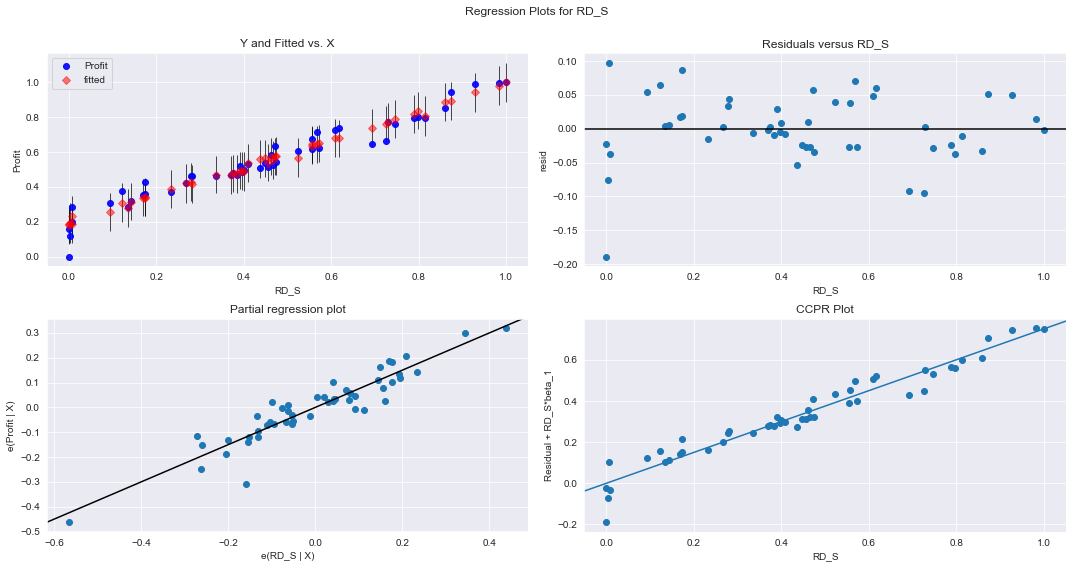

In [30]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_S', fig=fig )
plt.show()

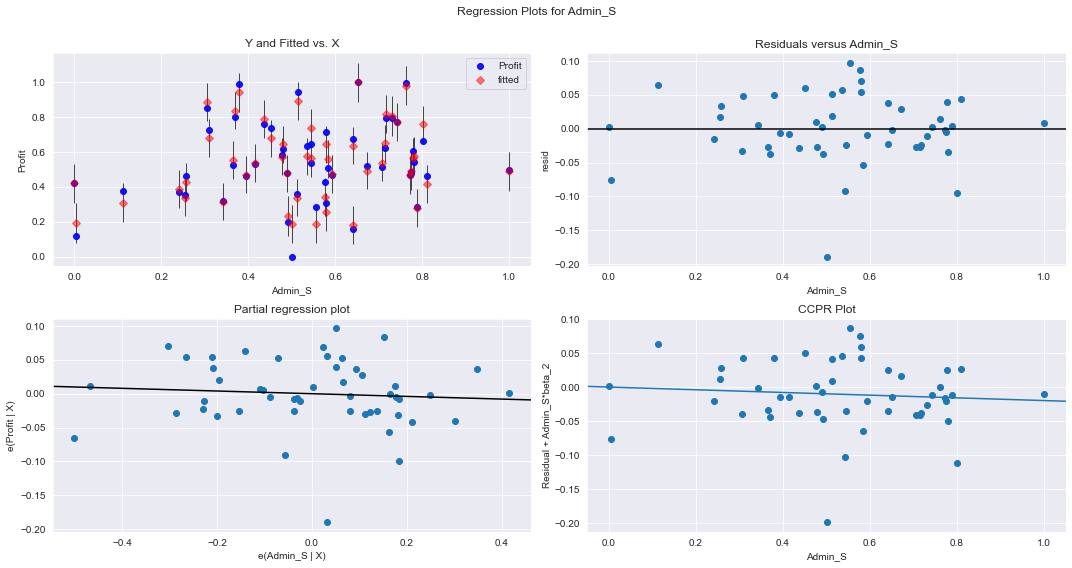

In [31]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Admin_S', fig=fig )
plt.show()

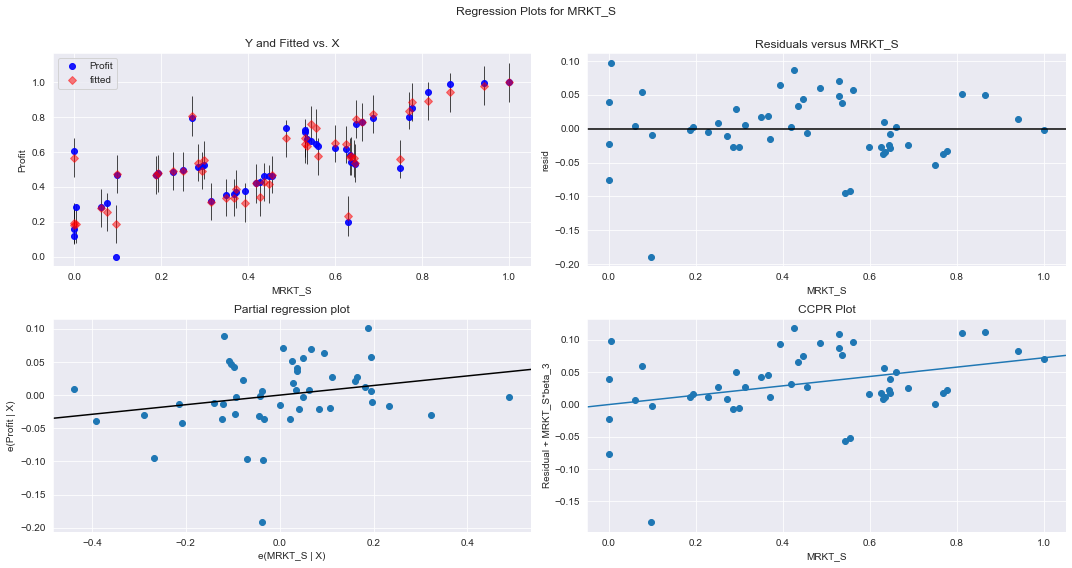

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MRKT_S', fig=fig )
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

## Cook’s Distance

In [33]:
model_influence = model.get_influence()
(c, _)= model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

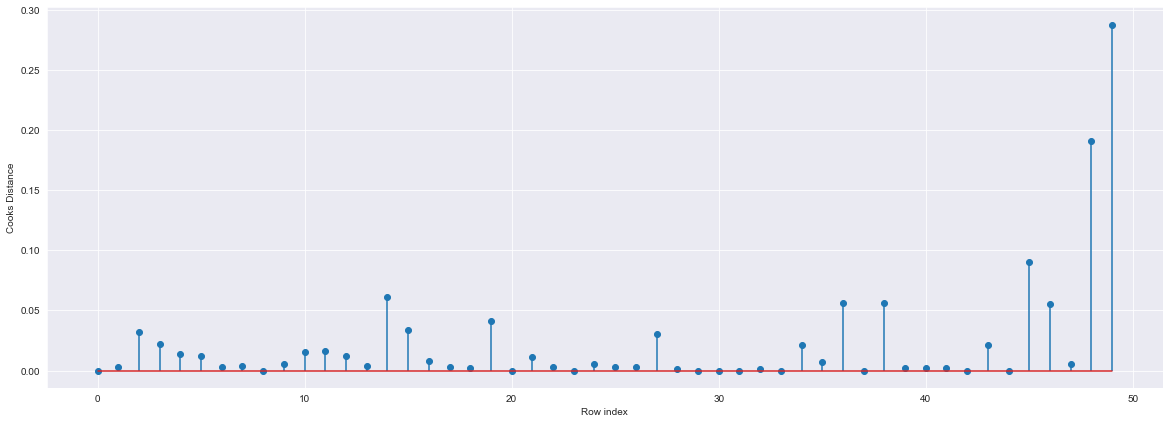

In [34]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
np.argmax(c), np.max(c)

(49, 0.2880822927543271)

# High Influence points

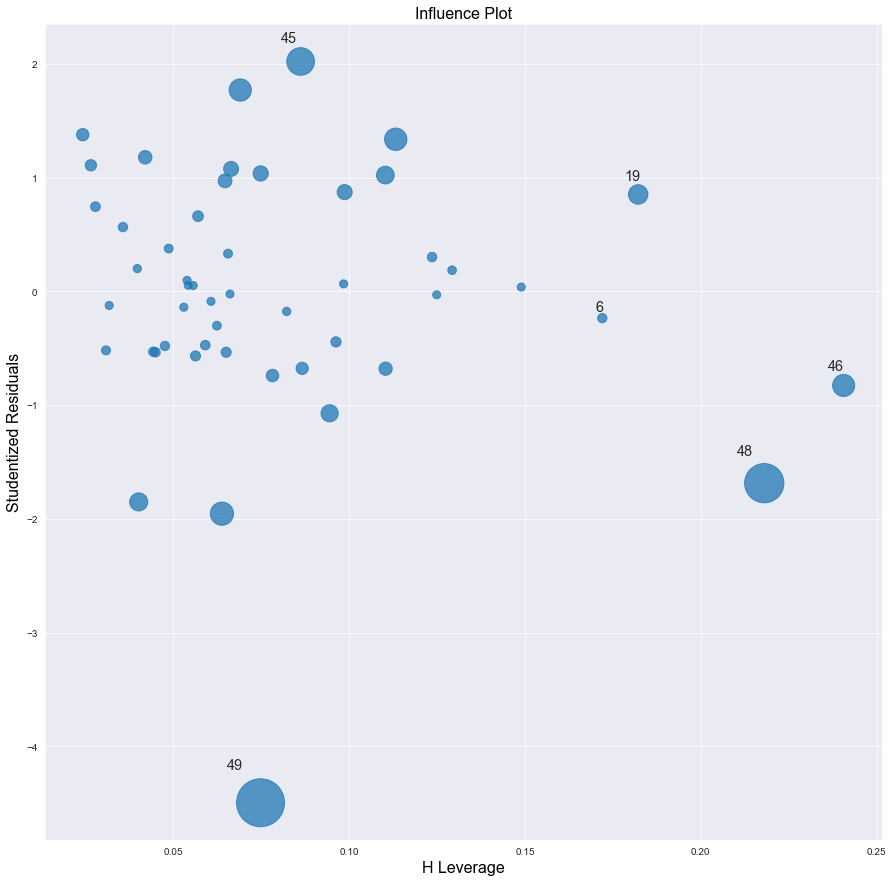

In [36]:
fig,ax = plt.subplots(figsize=(15, 15))
influence_plot(model, ax=ax)
plt.show()

In [37]:
k = startup_df.shape[1] # K is no. of columns

n = startup_df.shape[0] # n is no. of rows
print('no. of columns=',k,"\n",'no. of rows=', n)

# leverage cutoff value
leverage_cutoff = 3*((k + 1)/n)
print('leverage cutoff =',leverage_cutoff)

no. of columns= 4 
 no. of rows= 50
leverage cutoff = 0.30000000000000004


In [38]:
startup_df[startup_df.index.isin([49])]

,RD_S,Admin_S,MRKT_S,Profit
49,0.0,0.500148,0.095749,0.0


In [39]:
startup_df.tail(5)

,RD_S,Admin_S,MRKT_S,Profit
45,0.006049,0.554724,0.004036,0.282940
46,0.007956,0.491260,0.629768,0.196020
47,0.000000,0.640547,0.000000,0.156990
48,0.003278,0.003502,0.000000,0.118211
49,0.000000,0.500148,0.095749,0.000000


In [40]:
startup_df.shape

(50, 4)

In [41]:
# Significant difference in value of 49th record, so it is a outlier, droping it
startup_new = startup_df
startup_new = startup_new.drop(startup_new.index[[49]],axis=0)

In [42]:
startup_new.shape

(49, 4)

In [43]:
startup_new

,RD_S,Admin_S,MRKT_S,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997355
2,0.927985,0.379579,0.864664,0.993178
3,0.873136,0.512998,0.812235,0.947292
4,0.859438,0.305328,0.776136,0.853171
5,0.797566,0.369448,0.769126,0.801382
6,0.814128,0.730161,0.270710,0.796490
7,0.788018,0.717457,0.686493,0.794407
8,0.729018,0.741733,0.660500,0.774468
9,0.745906,0.436929,0.646443,0.760661


# Improving the model

In [44]:
#Rebuild model and generate R-Squared and AIC values

model1 = smf.ols('Profit ~RD_S+Admin_S+MRKT_S', data= startup_new).fit()

In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           8.85e-32
Time:                        15:14:41   Log-Likelihood:                 85.989
No. Observations:                  49   AIC:                            -164.0
Df Residuals:                      45   BIC:                            -156.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2059      0.021      9.950      0.000       0.164       0.248
RD_S           0.7291      0.036     20.470      0.000       0.657       0.801
Admin_S       -0.0164      0.032     -0.518      0.607      -0.080       0.047
MRKT_S         0.0670      0.037      1.825      0.075      -0.007       0.141
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
(c1, _)= model1.get_influence().cooks_distance
c1

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

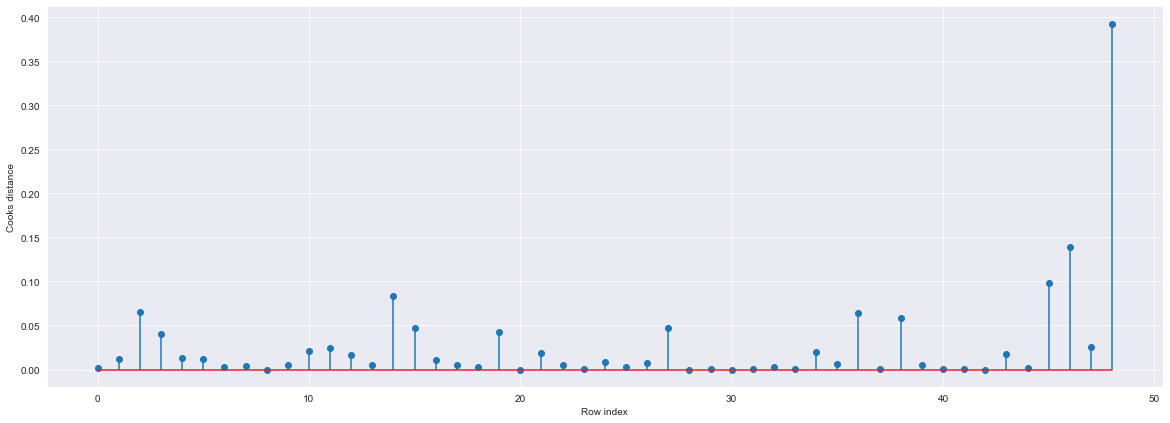

In [47]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new)), np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [48]:
np.argmax(c1), np.max(c1)

(48, 0.3927442055632145)

In [49]:
# leverage cutoff value
leverage_cutoff = 3*((4 + 1)/49)
print('leverage cutoff =',leverage_cutoff)

leverage cutoff = 0.30612244897959184


In [50]:
# deleting 48th record since its cook's distance value is beyond leverage cutoff
startup_new[startup_new.index.isin([48])]

,RD_S,Admin_S,MRKT_S,Profit
48,0.003278,0.003502,0.0,0.118211


In [51]:
startup_new = startup_new.drop(startup_new.index[[48]],axis=0)


In [52]:
startup_new.shape

(48, 4)

# Rebuilding Model

In [53]:
#Rebuild model and generate R-Squared and AIC values

model2 = smf.ols('Profit ~ RD_S+ Admin_S+ MRKT_S', data= startup_new).fit()

In [54]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.03e-31
Time:                        15:14:41   Log-Likelihood:                 86.850
No. Observations:                  48   AIC:                            -165.7
Df Residuals:                      44   BIC:                            -158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2318      0.022     10.418      0.000       0.187       0.277
RD_S           0.7351      0.034     21.718      0.000       0.667       0.803
Admin_S       -0.0469      0.032     -1.442      0.156      -0.112       0.019
MRKT_S         0.0449      0.036      1.249      0.218      -0.028       0.117
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
(c2, _)= model2.get_influence().cooks_distance
c2

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

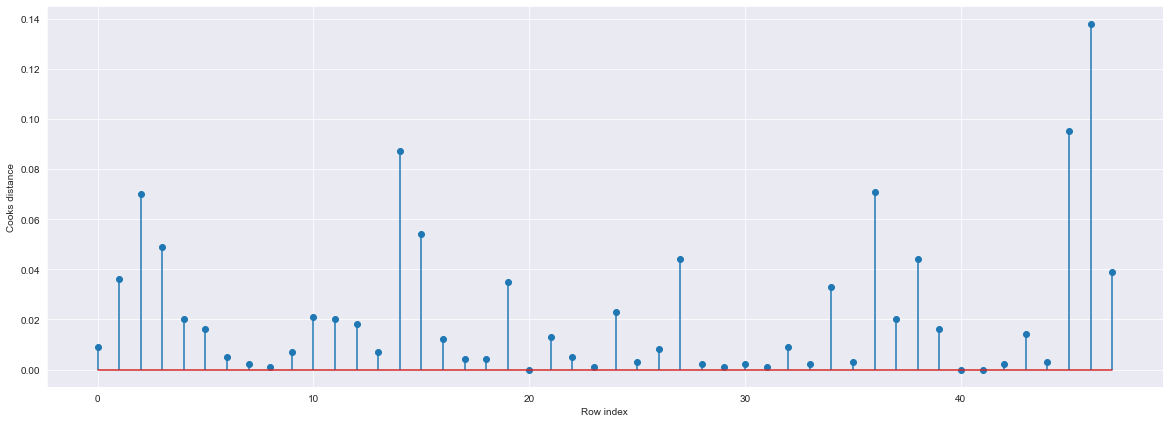

In [56]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new)), np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [57]:
np.argmax(c2), np.max(c2)

(46, 0.13829133994334597)

In [58]:
# leverage cutoff value
leverage_cutoff = 3*((4 + 1)/48)
print('leverage cutoff =',leverage_cutoff)

leverage cutoff = 0.3125


In [59]:
d2={'Model Name':['Model','Model1','Model2'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
table

,Model Name,Rsquared
0,Model,0.950746
1,Model1,0.961316
2,Model2,0.962677


### Model 2 is having highest R-squared value

# Model Prediction

In [60]:
pred_data=pd.DataFrame({'RD_S':70000,"Admin_S":90000,"MRKT_S":140000},index=[0])
pred_data

,RD_S,Admin_S,MRKT_S
0,70000,90000,140000


In [61]:
model2.predict(pred_data)

0    53524.809586
dtype: float64